# Acquiring Shapefiles and Writing to GeoJSON

In [156]:
import pymongo
import numpy as np
import pandas as pd
import geopandas as gpd
import topojson as tp
import json
import matplotlib.pyplot as plt
import us
from auth import Auth

## GeoPandas
- Mapped FIPS state numbers to state abbreviations from [```us```](https://github.com/unitedstates/python-us) package.
- Wrote data to TopoJSON file.

### Congressional Districts
- Downloaded TIGER files from [US Census Bureau](https://www2.census.gov/geo/tiger/TIGER2020/CD/).

In [267]:
fp = '../tl_2020_us_cd116/tl_2020_us_cd116.shp'
df = gpd.read_file(fp)

In [268]:
fips_dict = {}
for state in us.states.STATES:
    fips_dict[state.fips] = state.abbr

In [269]:
df['STATEFP'] = df['STATEFP'].map(fips_dict)
df.rename(columns={'STATEFP': 'state', 'CD116FP': 'cd'}, inplace=True)
df = df[['state', 'cd', 'geometry']]

In [270]:
# NaNs are at-large congressional districts
df.loc[df['state'].isna()]

,state,cd,geometry
194,NaN,98,"MULTIPOLYGON (((146.00199 16.02878, 146.01425 ..."
263,NaN,98,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
270,NaN,98,"POLYGON ((144.56343 13.44806, 144.56357 13.450..."
283,NaN,98,"MULTIPOLYGON (((-64.95671 17.67898, -64.95638 ..."
285,NaN,98,"MULTIPOLYGON (((-67.32325 18.36388, -67.32227 ..."
309,NaN,98,"MULTIPOLYGON (((-168.22527 -14.53591, -168.224..."


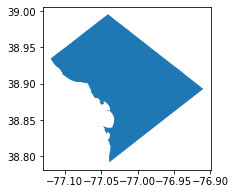

In [271]:
data = gpd.GeoDataFrame(df.iloc[263]).T
fig, ax = plt.subplots(1,1, figsize=(5,3))
data.plot(ax=ax)
plt.show()

In [272]:
# Set value to 'DC'
df.at[263, 'state'] = 'DC'

In [273]:
# Drop NaN 'state_fips'
df = df.loc[df['state'].notna()]

<AxesSubplot:>

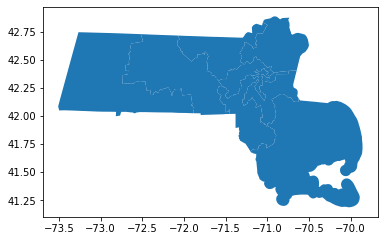

In [276]:
df.loc[df['state'] =='MA'].plot()

In [264]:
df = gpd.read_file('../app-dev/public/data/CA.topo.json')

In [211]:
# Generate TopoJSON files of individual states
states = list(df['state'].unique())
for state in states:
    topo = tp.Topology(data=df.loc[df['state'] == state])
    topo.to_json(f'./data/{state}.topo.json')

In [263]:
# Create states JSON file
states_dict = { state.abbr: state.name for state in us.states.STATES }
with open('../app-dev/public/data/states_dict.json', 'w') as f:
    json.dump(states_dict, f)

### States
- Downloaded data from composite Albers [TopoJSON GitHub](https://github.com/topojson/us-atlas#states-10m.json).
- Note: TopoJSON state data is mapped to SVG, the top-left corner is origin.

In [229]:
df = gpd.read_file('./data/USA.topo.json')

In [230]:
df['id'] = df['id'].map(fips_dict)
df.at[27, 'id'] = 'DC'

In [232]:
df.drop(columns='name', inplace=True)

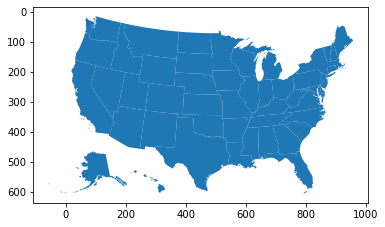

In [233]:
df.plot().invert_yaxis()

In [234]:
topo = tp.Topology(data=df)
topo.to_json('./data/USA.topo.json')